<a href="https://colab.research.google.com/github/barbosa-renan/estudos-ia/blob/main/Processamento_de_Linguagem_Natural_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento de linguagem natural com Python

## Importação das bibliotecas

In [ ]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [ ]:
!python3 -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 57.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Marcação POS

- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
- Lista de tokens: https://spacy.io/api/annotation#pos-tagging
- Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [ ]:
# ATUALIZAÇÃO DEZ-2024
# pln = spacy.load('pt')
pln = spacy.load('pt_core_news_sm')
pln

In [ ]:
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Curitiba')

In [ ]:
type(documento)

spacy.tokens.doc.Doc

In [ ]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Curitiba PROPN


## Lematização e stemização

In [ ]:
for token in documento:
  print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso curso
em em
Curitiba Curitiba


In [ ]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrariar',
 'cursar',
 'curso',
 'cursar']

In [ ]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
stemmer = nltk.stem.RSLPStemmer() # extrair o radical em portugues
stemmer.stem('aprender')

'aprend'

In [ ]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso curso curs
em em em
Curitiba Curitiba curitib


## Carregamento dos textos

In [ ]:
import urllib.request

# Add a User-Agent header to mimic a browser request
req = urllib.request.Request(
    'https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial',
    headers={'User-Agent': 'Mozilla/5.0'}
)
dados = urllib.request.urlopen(req)

In [ ]:
#'https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial'

In [ ]:
#dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Inteligência_artificial')

UnicodeEncodeError: 'ascii' codec can't encode character '\xea' in position 17: ordinal not in range(128)

In [ ]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width

In [ ]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-w

In [ ]:
paragrafos = dados_html.find_all('p')

In [ ]:
len(paragrafos)

79

In [ ]:
paragrafos[1]

<p>Em 1950, o matemático inglês Allan Turing escreveu sobre ser possível uma máquina pensar, e imitar o comportamento humano inteligente.<sup class="reference" id="cite_ref-10"><a href="#cite_note-10"><span class="cite-bracket">[</span>10<span class="cite-bracket">]</span></a></sup> Também esboçou uma proposta de pesquisa para tornar isto possível.
</p>

In [ ]:
paragrafos[1].text

'Em 1950, o matemático inglês Allan Turing escreveu sobre ser possível uma máquina pensar, e imitar o comportamento humano inteligente.[10] Também esboçou uma proposta de pesquisa para tornar isto possível.\n'

In [ ]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [ ]:
conteudo

'Na informática, a Inteligência Artificial (abreviado IA) genericamente é a inteligência, o raciocínio e o aprendizado exibida por máquinas semelhante ao raciocino humano;[1][2] busca desenvolver máquinas autônomas ou sistemas especialistas capazes de simular o pensamento humano e realizar várias tarefas complexas de forma independente.[3][4][5][6][7] É o sistema que permite aos computadores executar funções avançadas, como a capacidade de analisar dados em grande escala e fazer previsões/recomendações;[1][8] É um campo de pesquisa em ciência da computação que desenvolve e estuda métodos e softwares que permitem que as máquinas percebam seu ambiente e usem o aprendizado e a inteligência para tomar ações que maximizem suas chances de atingir objetivos definidos.[9] A IA iniciou na década de 1950 com os pesquisadores Alan Turing e Herbert Simon baseado no conceito do filósofo grego Aristóteles.\nEm 1950, o matemático inglês Allan Turing escreveu sobre ser possível uma máquina pensar, e i

In [ ]:
conteudo = conteudo.lower()
conteudo

'na informática, a inteligência artificial (abreviado ia) genericamente é a inteligência, o raciocínio e o aprendizado exibida por máquinas semelhante ao raciocino humano;[1][2] busca desenvolver máquinas autônomas ou sistemas especialistas capazes de simular o pensamento humano e realizar várias tarefas complexas de forma independente.[3][4][5][6][7] é o sistema que permite aos computadores executar funções avançadas, como a capacidade de analisar dados em grande escala e fazer previsões/recomendações;[1][8] é um campo de pesquisa em ciência da computação que desenvolve e estuda métodos e softwares que permitem que as máquinas percebam seu ambiente e usem o aprendizado e a inteligência para tomar ações que maximizem suas chances de atingir objetivos definidos.[9] a ia iniciou na década de 1950 com os pesquisadores alan turing e herbert simon baseado no conceito do filósofo grego aristóteles.\nem 1950, o matemático inglês allan turing escreveu sobre ser possível uma máquina pensar, e i

## Buscas em textos com spaCy

In [ ]:
# ATUALIZAÇÃO DEZ-2024
# pln = spacy.load('pt')
pln = spacy.load('pt_core_news_sm')
pln

In [ ]:
string = 'turing'
token_pesquisa = pln(string)

In [ ]:
pln.vocab

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [ ]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 130, 131),
 (8661325627334373315, 150, 151),
 (8661325627334373315, 837, 838),
 (8661325627334373315, 846, 847),
 (8661325627334373315, 883, 884),
 (8661325627334373315, 1025, 1026),
 (8661325627334373315, 4426, 4427),
 (8661325627334373315, 4436, 4437),
 (8661325627334373315, 4592, 4593),
 (8661325627334373315, 4597, 4598),
 (8661325627334373315, 4603, 4604),
 (8661325627334373315, 4666, 4667),
 (8661325627334373315, 5163, 5164),
 (8661325627334373315, 6746, 6747),
 (8661325627334373315, 6770, 6771),
 (8661325627334373315, 6879, 6880),
 (8661325627334373315, 6974, 6975),
 (8661325627334373315, 7091, 7092)]

In [ ]:
doc[130:131], doc[130-5:131+5]

(turing, 1950 com os pesquisadores alan turing e herbert simon baseado no)

In [ ]:
doc[130:131], doc[130-5:131+5]

(turing, 1950 com os pesquisadores alan turing e herbert simon baseado no)

In [ ]:
matches[0], matches[0][1], matches[0][2]

((8661325627334373315, 130, 131), 130, 131)

In [ ]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ... """))

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

independente.[3][4][5][6][7 MISC
alan turing PER
herbert simon PER
aristóteles PER
allan turing PER
google search MISC
youtube MISC
amazon ORG
netflix PER
google assistant MISC
siri PER
waymo PER
go LOC
pessoas.[11][12 ORG
aristóteles PER
alexandre PER
allan turing PER
herbert simon PER
john mccarthy PER
turing PER
computing machinery and inteiligence MISC
turing PER
herbert simon PER
allen newell PER
turing PER
herbert simon PER
allen newell PER
the simulation of human thought MISC
brasil LOC
allen newell PER
herbert simon PER
marvin minsky PER
mit ORG
lab MISC
darthmouth LOC
defense advanced research MISC
estados unidos LOC
fifth generation MISC
” MISC
japão LOC
prolog MISC
gpt-3[29 PER
google ORG
wikipédia MISC
john mccarthy PER
andreas kaplan PER
michael haenlein PER
john mccarthy PER
román LOC
john haugeland PER
w. grey walter PER
johns hopkins PER
universidade de princeton ORG
ratio club LOC
inglaterra LOC
david rumelhart PER
ai[39 ORG
humano.[40][41 MISC
aprendem).[41 PER
google

In [ ]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Nuvem de palavras e stop words

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'duas', 'tivestes', 'eventual', 'próxima', 'conhecida', 'era', 'fazia', 'tentei', 'dez', 'ligado', 'este', 'tempo', 'pouco', 'ter', 'pegar', 'nas', 'vossa', 'estiveram', 'meses', 'me', 'seis', 'somos', 'direita', 'pois', 'sois', 'à', 'diante', 'quatro', 'seus', 'tendes', 'estas', 'após', 'estás', 'dizem', 'nunca', 'sete', 'porquanto', 'primeira', 'num', 'cinco', 'por', 'vai', 'pode', 'meu', 'os', 'se', 'aos', 'posso', 'segundo', 'dois', 'usa', 'inclusive', 'tanta', 'quais', 'vos', 'tiveram', 'novos', 'demais', 'dentro', 'foram', 'questão', 'muitos', 'só', 'tarde', 'sempre', 'poderá', 'sou', 'quem', 'irá', 'conselho', 'puderam', 'pelos', 'vinda', 'naquele', 'está', 'momento', 'dão', 'talvez', 'pouca', 'estivestes', 'as', 'meio', 'posição', 'quinta', 'bem', 'iniciar', 'outros', 'ele', 'essas', 'estará', 'treze', 'em', 'fará', 'porquê', 'quê', 'longe', 'maioria', 'toda', 'alguns', 'nossa', 'nos', 'dezanove', 'temos', 'dezasseis', 'próprio', 'cá', 'parece', 'oitava', 'tente', 'antes', 've

In [ ]:
len(STOP_WORDS)

416

In [ ]:
pln.vocab['usa'].is_stop

True

In [ ]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [ ]:
print(lista_token)

['a', 'inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'um', 'campo', 'de', 'estudo', 'multidisciplinar', 'que', 'abrange', 'varias', 'áreas', 'do', 'conhecimento.[1][2', ']', 'é', 'também', 'um', 'conjunto', 'de', 'novas', 'tecnologias', 'que', 'permitem', 'aos', 'aparelhos', 'smart', 'executarem', 'várias', 'funções', 'avançadas', 'de', 'modo', 'quase', 'autônomo,[2][3', ']', 'representando', 'um', 'marco', 'histórico', 'na', 'computação', 'moderna.[3', ']', 'embora', 'seu', 'desenvolvimento', 'tenha', 'avançado', 'mais', 'na', 'ciência', 'da', 'computação', ',', 'sua', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'de', 'diversas', 'disciplina', '.', '\n', 'algumas', 'das', 'principais', 'áreas', 'relacionadas', 'à', 'ia', 'incluem', ':', '\n', 'é', 'difícil', 'definir', 'especificamente', 'a', 'inteligência', 'artificial', ',', 'mas', 'ao', 'longo', 'do', 'tem

In [ ]:
len(lista_token)

6316

In [ ]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [ ]:
print(sem_stop)

['informática', ',', 'inteligência', 'artificial', '(', 'abreviado', 'ia', ')', 'genericamente', 'inteligência', ',', 'raciocínio', 'aprendizado', 'exibida', 'máquinas', 'semelhante', 'raciocino', 'humano;[1][2', ']', 'busca', 'desenvolver', 'máquinas', 'autônomas', 'sistemas', 'especialistas', 'capazes', 'simular', 'pensamento', 'humano', 'realizar', 'várias', 'tarefas', 'complexas', 'independente.[3][4][5][6][7', ']', 'permite', 'computadores', 'executar', 'funções', 'avançadas', ',', 'capacidade', 'analisar', 'dados', 'escala', 'previsões', '/', 'recomendações;[1][8', ']', 'campo', 'pesquisa', 'ciência', 'computação', 'desenvolve', 'estuda', 'métodos', 'softwares', 'permitem', 'máquinas', 'percebam', 'ambiente', 'usem', 'aprendizado', 'inteligência', 'tomar', 'ações', 'maximizem', 'chances', 'atingir', 'objetivos', 'definidos.[9', ']', 'ia', 'iniciou', 'década', '1950', 'pesquisadores', 'alan', 'turing', 'herbert', 'simon', 'baseado', 'conceito', 'filósofo', 'grego', 'aristóteles', 

In [ ]:
len(sem_stop)

4390

In [ ]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap=color_map)

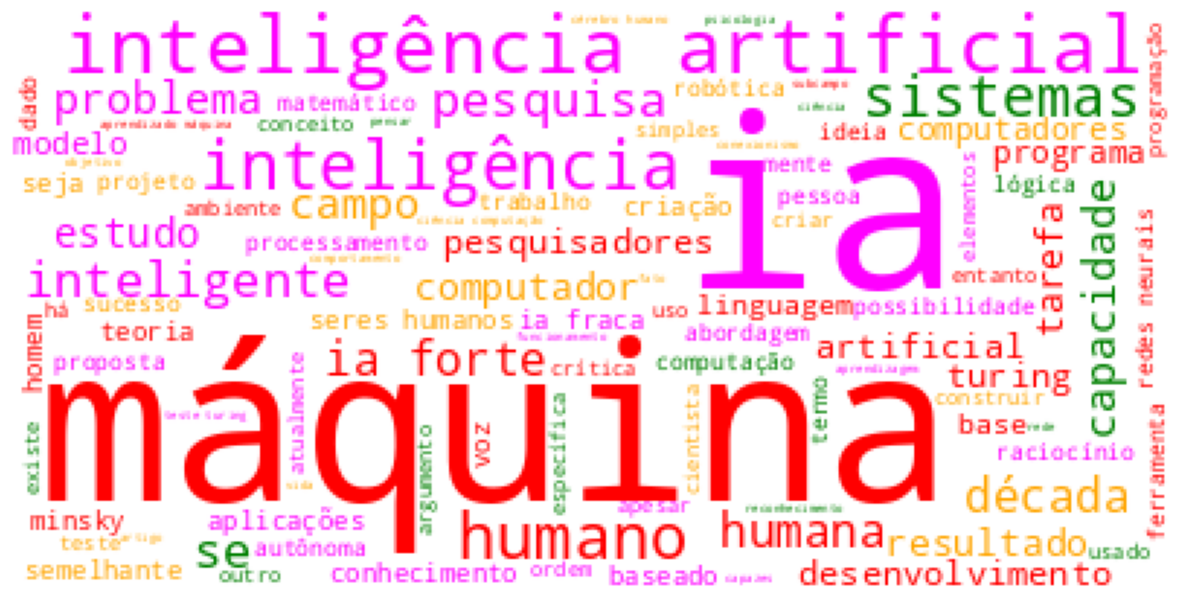

In [ ]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()